<h1>Project 3 - Regression</h1>

<h2>Introduction</h2>
House Prices - Advanced Regression Techniques is a Kaggle Competition relating to the prediction of housing sale prices through regression modeling.

The dataset used is split into two files, training and testing with 79 different attributes relating to the condition, location, and other information about houses recently sold on the market. The goal of this competition is to predict what the sale price of a house will be based on these different attributes, and is tested with Root-Mean-Squared-Error evaluation.

<h2>Regression</h2>

Regression is a type of statistical method aimed to understand the relationship between multiple independent and dependent variables through prediction and modeling relationships. Linear regression does this by building on the algebraic equation y = mx + b where y is the dependent variable being solved for, m is the slope function, x is the independent variable, and b is the y-intercept. 

The equation for Linear regression is
<img src="linearregression.png">

Where Y<small>i</small> is the dependent variable
f is the slope function
X<small>i</small> is the independent variable
B is the unknown parameter, and 
e<small>i</small> are error terms

<h2> Data Understanding </h2>
Before working with the data, it is important to understand what the data looks like, so I will be running a few tests in order to see some information about the data, notablely a detailed list of all of the attributes, how many missing values there are, and a correlation map of all of the attributes.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

First 5 rows of the dataset:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



Missing Values:


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


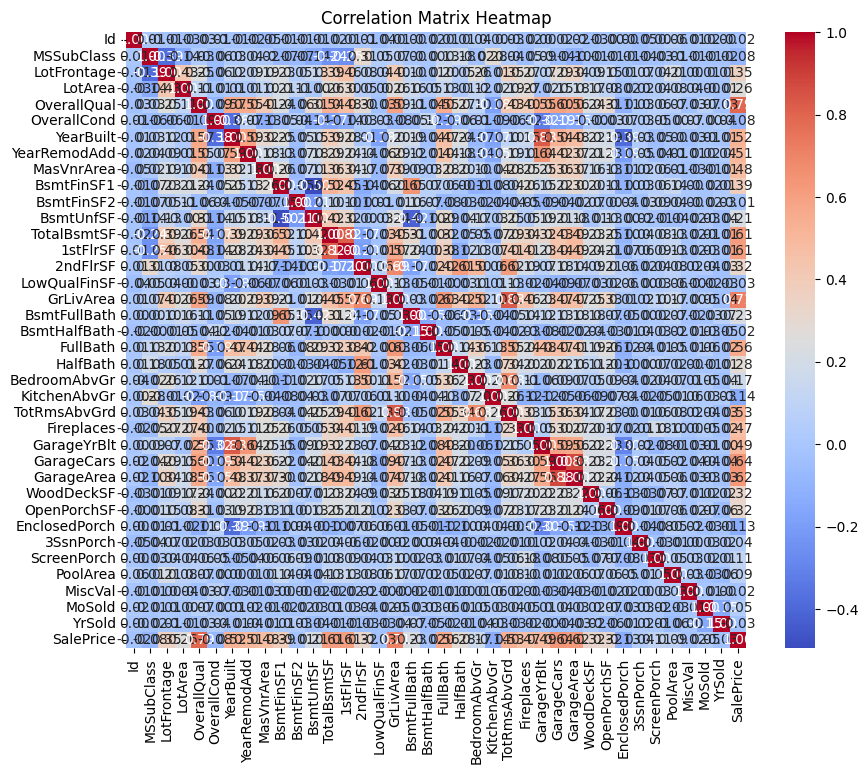

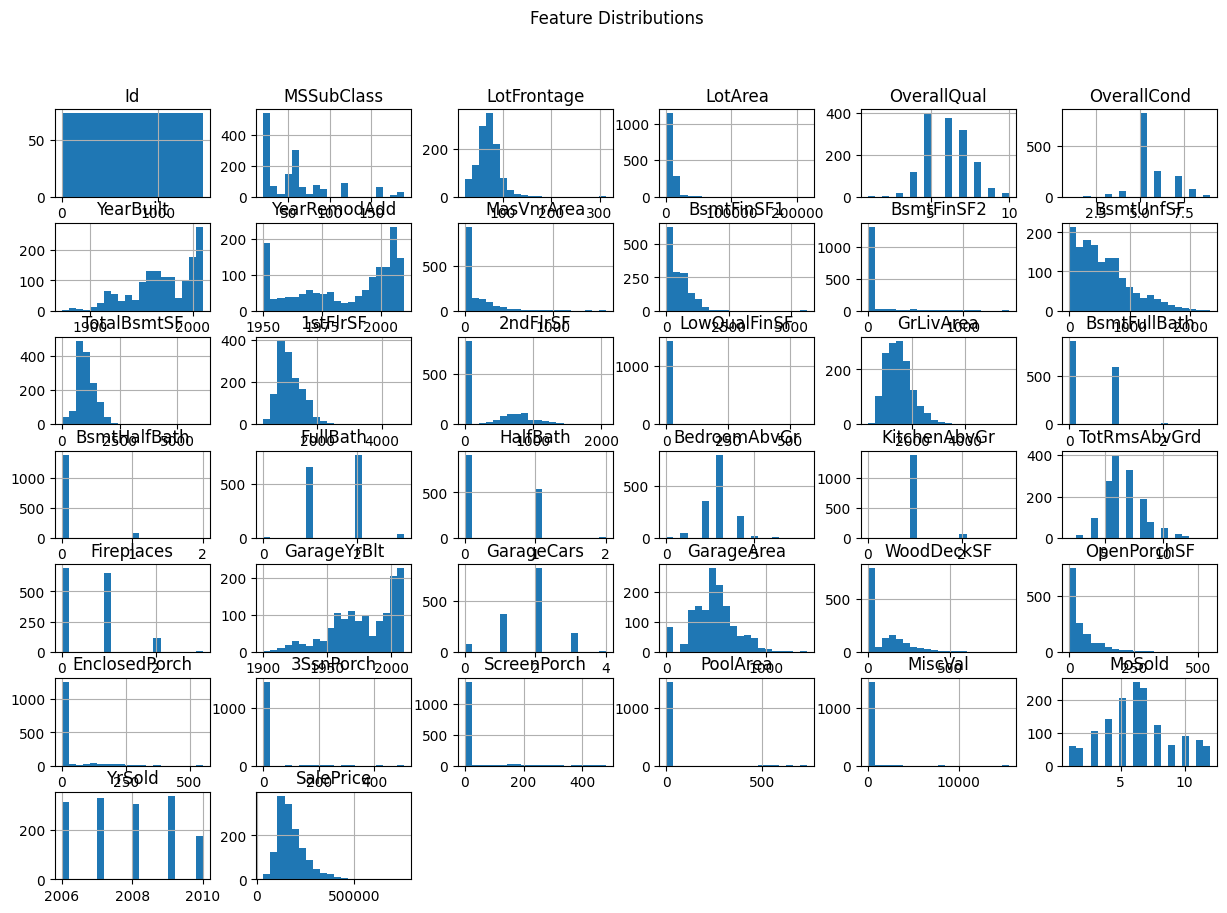

In [33]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

print("First 5 rows of the dataset:")
display(train_df.head())

print("\nDataset Info:")
train_df.info()

display(train_df.describe())

print("\nMissing Values:")
missing_values = train_df.isnull().sum()
display(missing_values[missing_values > 0])


numeric_cols = train_df.select_dtypes(include=['number'])
correlation_matrix = numeric_cols.corr()

display(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


train_df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()


<h2>Pre-Processing</h2>
During the exploration phase, I noticed that the dataset has a lot of missing values which I would like to remove; however, based on the volume of missing values, I cannot remove all them all, so instead I will fill all of the missing values with the mean value of the column. 
Additionally, I will be converting categorical variables into numeric values so I can calculate with them later.

In [13]:
train_df.fillna(train_df.select_dtypes(include=['number']).mean(), inplace=True)
test_df.fillna(test_df.select_dtypes(include=['number']).mean(), inplace=True)

train_df = pd.get_dummies(train_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

<h2>Experiment 1</h2>
For my first experiment, I will use SalePrice as the target column and test a Linear Regression model with the train and test data.

In [31]:
target_column = 'SalePrice'
X = train_df.drop(columns=[target_column])
y = train_df[target_column]

X, test_df = X.align(test_df, join='inner', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

<h2>Experiment 1 - Evaluation</h2>
In order to evaluate the experiment, I will be finding the Mean Squared Error, the Root Mean Squared Error, and the R^2 Score. The results show a very high MSE and RMSE; however, the R^2 Score is roughly 0.8 which is good, so we will need to try and fit the data more for more accurate results.

In [30]:
y_val_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation Mean Squared Error: {mse}")
print(f"Validation Root Mean Squared Error (RMSE): {rmse}")
print(f"Validation R² Score: {r2}")


Validation Mean Squared Error: 1570711805.6632428
Validation Root Mean Squared Error (RMSE): 39632.20667163567
Validation R² Score: 0.7952222939108535


<h2>Experiment 2</h2>
For my second experiment I will be removing features from my data that are not strongly correlated to Sale Price through the SelectKBest function to find the top 10 features based on correlation.

In [ ]:
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_new, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

LinearRegression()

<h2>Experiment 2 - Evaluation</h2>
Experiment 2 showed better results than Experiment 1; however, the MSE and RMSE are still much higher than I would like them to be.

In [34]:
y_val_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation Mean Squared Error: {mse}")
print(f"Validation Root Mean Squared Error (RMSE): {rmse}")
print(f"Validation R² Score: {r2}")


Validation Mean Squared Error: 1203419247.5705152
Validation Root Mean Squared Error (RMSE): 34690.33363302398
Validation R² Score: 0.8431071619297095


<h2>Experiment 3</h2>
For Experiment 3, I will be using a different type of Regression model to test the data, specifically Random Forest Regressor. This Regression model works similarly to a decision tree model, and is better equiped to handle data that have non-linear relationships.

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

<h2>Experiment 3 - Evaluation</h2>
I will be evaluating Experiment 3 the same way I did the first 2 models, and the results are significantly better than before. I was able to decrease the MSE and RMSE by roughly 25 percent, which is a very good step in the progress of my model. 

In [35]:
y_val_pred = rf_model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation Mean Squared Error: {mse}")
print(f"Validation Root Mean Squared Error (RMSE): {rmse}")
print(f"Validation R² Score: {r2}")

Validation Mean Squared Error: 872733618.427417
Validation Root Mean Squared Error (RMSE): 29542.065236327286
Validation R² Score: 0.886219491211513


<h2>Impact</h2>
This project impacts many people who are attempting to buy a home. The housing market is notoriously unreliable, so having a tool that could predict what the price of a house could be will be very helpful to both people who are looking to buy a house, but will also keep the people selling the houses responsible and ethical in their practice.

<h2>Conclusion</h2>
I am somewhat happy with the results of my experiments, I was able to significantly reduce the error from my models while keeping accuracy in the data itself. I think my problems were caused in my preprocessing stage, changing a large amount of data to be the average skewed my data a lot; however, I did not want to completely remove those rows completely. In the future, I think I will reassess my preprocessing stage to find a way to more successfully set up my data for a more effective model.

<h2>References</h2>

Dataset from Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview
My Jupyter Notebook: 